In [22]:
import matplotlib.pyplot as plt
import os
import glob
import pathlib
from PIL import Image

In [3]:
data_dir = './data/character/'
character_csv = './data/label_character.csv'

In [7]:
images_list = glob.glob(str(pathlib.Path(data_dir)/'**/*.jpg'), recursive=True)

characters = {}
f = open(character_csv, 'r', encoding='utf-8')
for line in f.readlines():
    characters[line.split(',')[0]] = int(line.split(',')[1])

In [8]:
print('Total number of images: %d' % len(images_list))
print('Total number of characters: %d' % len(characters))

Total number of images: 138499
Total number of characters: 7328


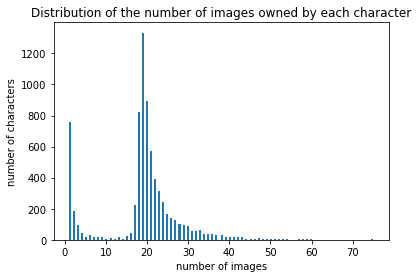

In [14]:
character_number = {}
for item in characters.keys():
    character_number[item] = 0
    
for idx, file_path in enumerate(images_list):
    temp_char = file_path.split(os.sep)[-2]
    character_number[temp_char] +=1
    
plt.figure()
plt.title('Distribution of the number of images owned by each character')
plt.hist(list(character_number.values()), bins=150)
plt.xlabel('number of images')
plt.ylabel('number of characters')
plt.show()

In [37]:
more_than_20 = 0
more_than_30 = 0
more_than_40 = 0
more_than_50 = 0
more_than_60 = 0

for item in character_number.values():
    if item >= 60:
        more_than_60 += 1
    if item >= 50:
        more_than_50 += 1
    if item >= 40:
        more_than_40 += 1
    if item >= 30:
        more_than_30 += 1
    if item >= 20:
        more_than_20 += 1

print('Characters with more than 60 images: %d' % more_than_60)
print('Characters with more than 50 images: %d' % more_than_50)
print('Characters with more than 40 images: %d' % more_than_40)
print('Characters with more than 30 images: %d' % more_than_30)
print('Characters with more than 20 images: %d' % more_than_20)

Characters with more than 60 images: 6
Characters with more than 50 images: 33
Characters with more than 40 images: 150
Characters with more than 30 images: 609
Characters with more than 20 images: 3654


In [27]:
image_height = {}
image_width = {}

for item in images_list:
    img = Image.open(item)
    height, width = img.size
    
    if height in image_height.keys():
        image_height[height] += 1
    else:
        image_height[height] = 0
    
    if width in image_width.keys():
        image_width[width] += 1
    else:
        image_width[width] = 0

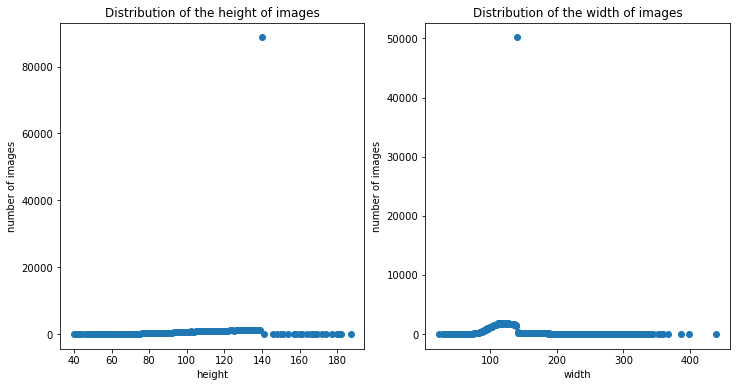

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Distribution of the height of images')
plt.scatter(list(image_height.keys()), list(image_height.values()))
plt.xlabel('height')
plt.ylabel('number of images')

plt.subplot(1, 2, 2)
plt.title('Distribution of the width of images')
plt.scatter(list(image_width.keys()), list(image_width.values()))
plt.xlabel('width')
plt.ylabel('number of images')

plt.show()